In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import nltk
from collections import Counter
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import os
import seaborn as sns
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode 

# https://pypi.org/project/biterm/
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms
from biterm.cbtm import oBTM
from biterm.btm import oBTM
from urllib import request
import requests
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Open the Data Set
df = pd.read_csv('/work/qs-show-and-tells - qs-show-and-tells.csv',header=None)
#Set up the Columns
df.columns = ["URL", "Topics", "Tools", "Start of the speech", "Link to the video"]

In [ ]:
df

,URL,Topics,Tools,Start of the speech,Link to the video
0,https://quantifiedself.com/show-and-tell/?proj...,diet and weight loss | food tracking | spo...,Fitbit,NaN,https://player.vimeo.com/video/33565756?app_id...
1,https://quantifiedself.com/show-and-tell/?proj...,cognition | sports & fitness | mood & emotion,23andMe | coronary calcium scan | Fitbit | Ins...,Hello I’m Mark and I’m going to first publicly...,https://player.vimeo.com/video/96591409?app_id...
2,https://quantifiedself.com/show-and-tell/?proj...,mood & emotion | productivity | stress,self-report cognitive functioning,I’m Jenny and I’m going to talk to you about m...,https://player.vimeo.com/video/100583400?app_i...
3,https://quantifiedself.com/show-and-tell/?proj...,diet and weight loss | productivity | sleep,Excel | Fitbit | Moves | MyFitnessPal | Runkee...,I’m Kouris Kalligas. I run a startup called Ad...,https://player.vimeo.com/video/104559409?app_i...
4,https://quantifiedself.com/show-and-tell/?proj...,cognition | mood & emotion,SuperMemo,"grade in high school, I hear seemed it took li...",https://player.vimeo.com/video/101714344?app_i...
...,...,...,...,...,...
335,https://quantifiedself.com/show-and-tell/?proj...,heart rate / cardiovascular | metabolism,Continuous Glucose Monitor | Emfit | Fitbit |...,NaN,https://player.vimeo.com/video/292488936?app_i...
336,https://quantifiedself.com/show-and-tell/?proj...,chronic condition | sports & fitness,1-Button Tracker | gps,I’m Thomas Blomseth Christiansen and I will ta...,https://player.vimeo.com/video/292498121?app_i...
337,https://quantifiedself.com/show-and-tell/?proj...,sports & fitness,Blood glucose monitor | heart rate monitor | M...,Hi I’m Mikey. I work for Adafruit as a biohack...,https://player.vimeo.com/video/292492270?app_i...
338,https://quantifiedself.com/show-and-tell/?proj...,food tracking | metabolism,Freestyle Libre | Jupyter notebook,Inspired by research that shows that the blood...,https://player.vimeo.com/video/313405930?app_i...


## Transcripts Extraction

In [ ]:
#Extract the Transcript
transcripts = []
links  = df.URL.to_list()
for link in links:
  r = requests.get(link)
  c = r.content
  soup = BeautifulSoup(c)
  if soup.find('div', {'class' :'transcript'}) !=None:
    transcript = soup.find('div', {'class' :'transcript'}).text
    transcripts.append(transcript)
  else:
    transcripts.append(None)

## Text Processing

In [ ]:
#Set up a Text Cleaning Function

def clean_text(text):
    
    #remove accentsftopics
    text=unidecode(text)
    
    # lowercase\
    text=text.lower()
    
    # remove punctuation
    text=re.sub(r'[^\sa-zA-Z0-9@\[\]]',' ',text)
    text = re.sub(r'@\S+', "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\st\s", " ", text)
    text = re.sub(r"\si\s", " ", text)
    text = re.sub(r"\ss\s", " ", text)
    text = re.sub(r"m\s", " ", text)
    text = re.sub(r"ve\s", " ", text)


    return text

In [ ]:
#Create a DataFrame with the transcripts
transcripts_df = pd.DataFrame(transcripts)
transcripts_df.columns = ['Transcripts']

In [ ]:
#Creat a string from the Transcript
transcripts_list = transcripts_df.Transcripts.tolist()
transcripts_txt = str(transcripts_list)

In [ ]:
#First StopWords removing
transcripts_txt = remove_stopwords(transcripts_txt)

In [ ]:
#lowercase
transcripts_txt = transcripts_txt.lower()
#df_total['transcripts'] = df_total['transcripts'].str.lower()

In [ ]:
#punctuation 
clean_text(transcripts_txt)
transcripts_txt=unidecode(transcripts_txt)
transcripts_txt = re.sub(r'[^\w\s]', '', transcripts_txt) 
transcripts_txt = transcripts_txt.replace('[^\w\s]','')
#df_total['transcripts'] = df_total['transcripts'].str.replace('[^\w\s]','')

In [ ]:
#numbers
transcripts_txt = transcripts_txt.replace('\d+','')
#df_total['transcripts'] = df_total['transcripts'].str.replace('\d+','')

In [ ]:
#Lemmatizer Function

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
        
# Lemmatization function
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
transcripts_txt = lemmatize_sentence(transcripts_txt)

In [ ]:
#tokenize
from nltk.tokenize import word_tokenize
txt_tokens = word_tokenize(transcripts_txt)
#words=[word.lower() for word in txt_tokens if word.isalpha()]

In [ ]:
#Removing The other stopwords added by and
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
sw_list = ['basically','like', 'know','actually','things', 'going','lot','want','thing','got','way','year','years','like', 'know','things', 'going','lot','want','thing','got','way','started','go','get','im','really','time','none','ive','ill','youre','didnt','thats']
all_stopwords.extend(sw_list)

tokens_without_sw = [word for word in txt_tokens if not word in all_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokens_without_sw

['rob',
 'portil',
 'weight',
 'loss',
 'muscle',
 'gain',
 'fitbitso',
 'weight',
 'loss',
 'muscle',
 'gain',
 'fitbit',
 'life',
 'overweight',
 'twice',
 'severely',
 'overweight',
 '25',
 'pound',
 'overweight',
 'recently',
 '10',
 '15',
 'pound',
 'overweighti',
 'lose',
 '10',
 'pound',
 'fat',
 'add',
 'pound',
 'muscle',
 'month',
 'little',
 'device',
 'youve',
 'see',
 'people',
 'talk',
 'called',
 'fitbit',
 'company',
 'big',
 'advocate',
 'itwhat',
 'decide',
 'overweight',
 '165',
 'pound',
 'great',
 'realize',
 'infact',
 'college',
 'weight',
 'muscle',
 '66',
 'old',
 'inch',
 'shorter',
 'scoliosis',
 'spine',
 'little',
 'short',
 '165',
 'pound',
 'start',
 'fall',
 'belt',
 'decide',
 '155',
 'pound',
 'high',
 'school',
 'weight',
 'ideal',
 'probably',
 'look',
 'betteri',
 'start',
 'fitbit',
 'tracked',
 'calorie',
 'burn',
 'pedometer',
 'steroid',
 'track',
 'everything',
 'track',
 'movement',
 'day',
 'long',
 'tracks',
 'sleep',
 'night',
 'wear',
 'wr

## Visualisations of the cleaned Text

In [ ]:
#Showing the top 20 most frequent words
fdist = FreqDist(tokens_without_sw)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])
#top 20 words 
df_fdist20 = df_fdist.sort_values(['frequency'], ascending=False).head(20)
df_fdist20 

,word,frequency
486,data,1816
64,day,1640
198,think,1325
235,kind,1271
54,look,1260
190,work,1216
61,track,1152
46,start,1149
26,people,1013
80,try,826


Text(0.5, 1.0, 'TOP 20 frequent words which occurred the texts')

<Figure size 1440x720 with 0 Axes>

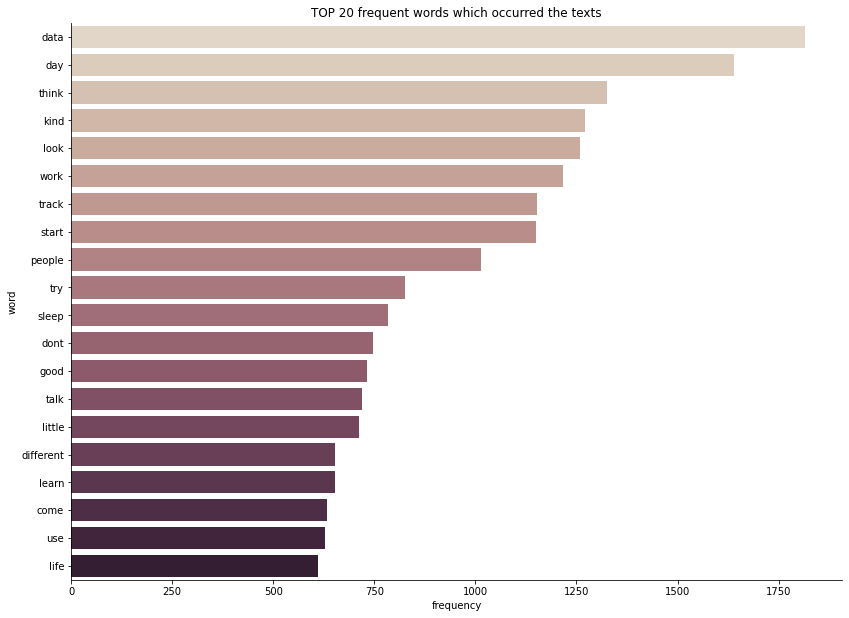

In [ ]:
#ploting top 20 words 
plt.figure(figsize=(20,10))
sns.catplot(y="word", x="frequency", kind="bar", palette="ch:.25", data=df_fdist20, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 frequent words which occurred the texts')

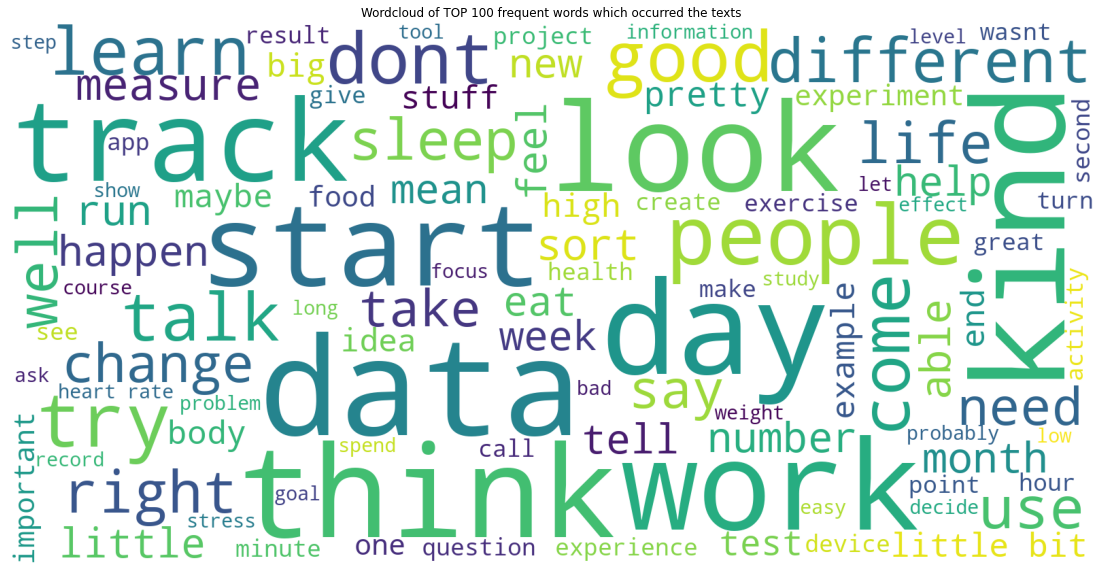

In [ ]:
#Create a WordCloud for the TOP 100 frequent words
# using list comprehension 
listToStr= ' '.join(map(str, tokens_without_sw)) 

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100, background_color="white", collocations=True).generate(listToStr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of TOP 100 frequent words which occurred the texts')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'TOP 20 pair of words which occurred the texts')

<Figure size 1440x720 with 0 Axes>

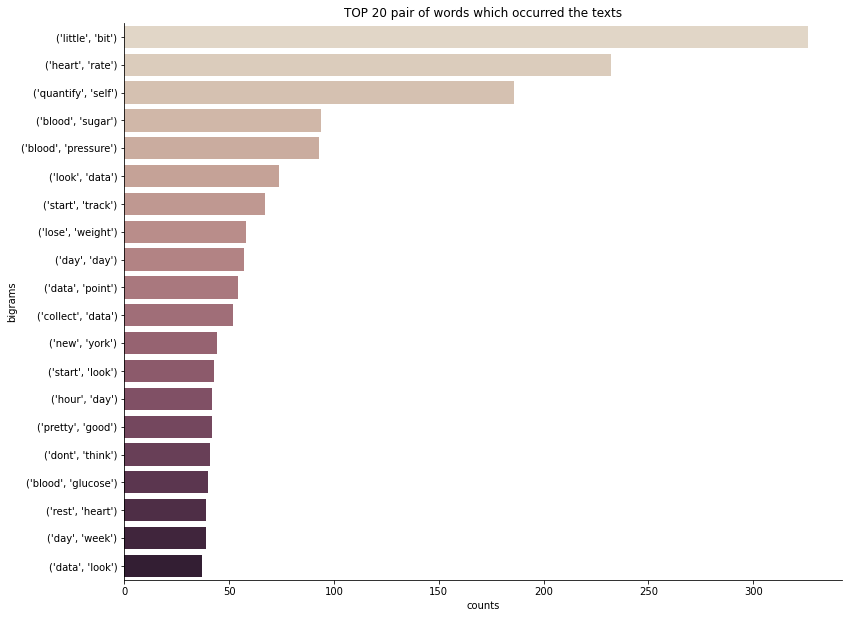

In [ ]:
#Plot the TOP 20 Pair of words which occured the texts
bigrams_series = (pd.Series(nltk.ngrams(tokens_without_sw, 2)).value_counts())[:20]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 0:'counts'})
bigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="ch:.25", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 pair of words which occurred the texts')

Text(0.5, 1.0, 'TOP 20 Trigrams of words which occurred the texts')

<Figure size 1440x720 with 0 Axes>

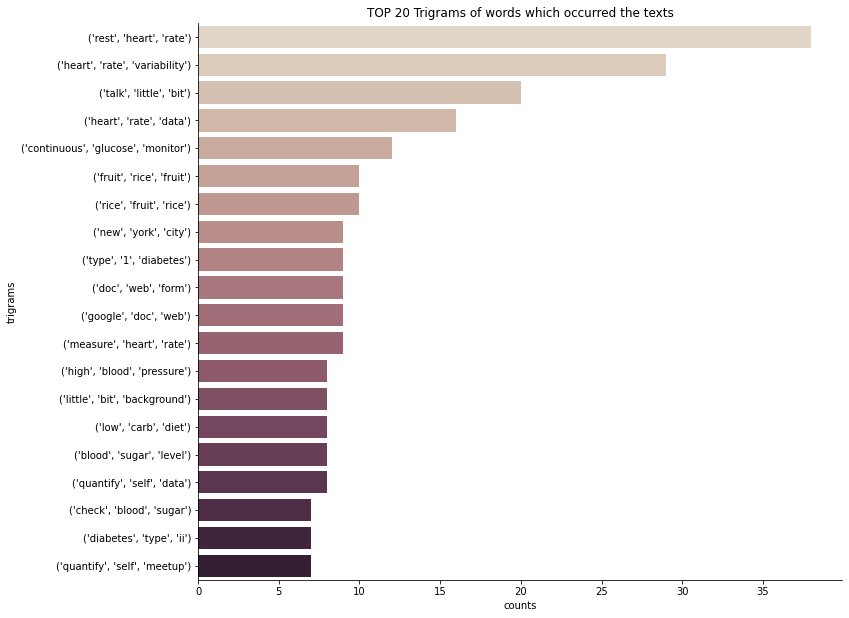

In [ ]:
#Plot the TOP 20 Trigrams which occured the texts
bigrams_series = (pd.Series(nltk.ngrams(tokens_without_sw, 3)).value_counts())[:20]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'trigrams', 0:'counts'})
bigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='trigrams', kind="bar", palette="ch:.25", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 Trigrams of words which occurred the texts')

In [ ]:
dataset = [d.split() for d in tokens_without_sw]

## Topic Modeling

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(dataset)
# Create Corpus
texts = dataset
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1)]


In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.046*"day" + 0.028*"glucose" + 0.023*"hour" + 0.023*"focus" + 0.023*"try" + 0.018*"blood" + 0.015*"use" + 0.014*"week" + 0.013*"eat" + 0.012*"take"'), (1, '0.034*"start" + 0.026*"look" + 0.023*"cholesterol" + 0.018*"talk" + 0.018*"well" + 0.015*"little" + 0.013*"rate" + 0.013*"month" + 0.013*"change" + 0.012*"tell"'), (2, '0.040*"data" + 0.033*"run" + 0.019*"fast" + 0.019*"level" + 0.018*"dont" + 0.017*"pretty" + 0.017*"people" + 0.015*"maybe" + 0.013*"right" + 0.013*"high"'), (3, '0.061*"kind" + 0.036*"work" + 0.034*"think" + 0.025*"track" + 0.015*"learn" + 0.014*"new" + 0.012*"come" + 0.011*"good" + 0.010*"stress" + 0.010*"diet"')]


In [1]:
#Create a Wordcloud plotting the words from the 4 topics found in the Trancript
# using list comprehension 
listToStr= ' '.join(map(str, lda_model.print_topics())) 

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100, background_color="white", collocations=True).generate(listToStr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Words of the 4 revelent Topics in transcripts')
plt.axis("off")
plt.show()

NameError: name 'lda_model' is not defined

In [ ]:
#Show the 4 topics
for idx, topic in lda_model.show_topics(formatted=False, num_words= 15):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: day|glucose|hour|focus|try|blood|use|week|eat|take|number|pattern|food|sort|project
Topic: 1 
Words: start|look|cholesterol|talk|well|little|rate|month|change|tell|point|feel|study|heart|mean
Topic: 2 
Words: data|run|fast|level|dont|pretty|people|maybe|right|high|different|need|probably|experiment|end
Topic: 3 
Words: kind|work|think|track|learn|new|come|good|stress|diet|cycle|line|sleep|quantify|story


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5856d809-74d3-4b70-a609-01b726af746b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>